<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 8. Elastic material
## Thin elastic plate
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

----
In this notebook, we discuss the **thin elastic plate** as an approximation for elastic deformation under a 
load. We will introduce the **differential equation** and two **analytical solutions**, and then
solve the problem also numerically with **finite differences**.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

----
## Theory

The **differential equation** for the vertical deflection of an elastic plate under a surface load is described by
the **fourth-order equation**:
$$
\frac{d^2}{dx^2} \left( D \frac{d^2 w}{dx^2} \right) = q
$$

We define as variables:

- $x$ [m] horizontal distance
- $w$ [m] vertical deflection
- $D$ [Nm] flexural rigidity
- $q$ [Pa] load

The **flexural rigidity** $D$ is defined as
$$
D = \frac{E h^3}{12 (1-\nu^2)}
$$
with
- $h$ [m] the **plate thickness**
- $E$ [Pa[ the **Young modulus**
- $\nu$ [-] the **Poisson ratio**

The **load** can be a sediment load ...

<img src='images/elastic_plate.jpg' style=width:15cm;>

Here, the three contributions are
**sediment load** $q_L$,
**water load** $q_W$, and
**mantle load** $q_M$:
$$
\begin{array}{rcl}
q(x)   &=& q_L + q_M + q_W \\
q_L(x) &=& \rho_T g t(x) \\
q_W(x) &=& \rho_W g w(x) \\
q_M(x) &=& - \rho_M g w(x)
\end{array}
$$
with
- $\rho_T$ [kg/m$^3$] density of sediment
- $\rho_W$ [kg/m$^3$] density of water
- $\rho_M$ [kg/m$^3$] density of mantle
- $g$ [m/s$^2$] gravitational acceleration

While for the sediment load the **topography** $t(x)$ is given as input,
the water and mantle loads result from the **vertical displacement** $w(x)$.

We can therefore rearrage the differential equation to:
$$
\frac{d^2}{dx^2} \left( D \frac{d^2 w}{dx^2} \right) + \left( \rho_m - \rho_w \right) g w = q_L
$$

### Analytical solution

We transform the differential equation to the wavenumber domain, with $k$ [1/m] the wave number, and
then finally find as **analytical solution**:
$$\fbox{$
w(x) = w_0 e^{-\frac{|x|}{a}} \left( \cos(\frac{|x|}{a}) + \sin(\frac{|x|}{a}) \right)
$}$$
Here,
- $a$ [m] is the flexure parameter:
$$
a^4 = \frac{4 D}{(\rho_M - \rho_W)g}
$$
and
- $w_0$ [m] is the deformation at $x=0$, given as
$$
w_0 = \rho_T g t \Delta x \frac{a^3}{8 D}
$$
Note that we multiplied the sediment load $\rho_T g t$ by $\Delta x$ [m] (and not the area $\Delta x \Delta y$), 
as we solve only the 2D problem, thus the load is transferred into a line load.
The absolute values are needed to plot also into the negative $x$-direction.

In [3]:
def flexure1D(x,w0,a):
    w = w0 * np.exp(-np.abs(x)/a) * (np.cos(np.abs(x)/a) + np.sin(np.abs(x)/a))
    return w

----
## Analytical 1D example

We define a set of **plate thicknesses** $h \in [5,10,30]$ [km], and
as **elastic parameter** values $E=70\mbox{ GPa}$ and $\nu=0.25$.

As **sediment load**, we use $h_{topo}=100$m as height, and a width of $\Delta x=5\mbox{ km}$.

**Densities** are
$[\rho_T,\rho_W,\rho_M]=[2200,1000,3300]$ kg/m$^3$

In [2]:
# plate parameter
h = np.array([5e3,10e3,30e3]) # m
E =  70e9  # Pa
nu = 0.25  # -
#print(h,E,nu)

# materials
htopo   = 1e2
hwidth  = 5000.
rhotopo = 2200.
rhowater = 1000.
rhomantle = 3300.
g    = 9.81
#print(rhotopo,rhowater,rhomantle,g)

# flexural rigidity [Nm]
D = np.zeros(len(h))
# flexural parameter [m]
a = np.zeros(len(h))

for i in range(len(h)):
    D[i] = E*h[i]**3 / (12*(1-nu**2))
    a[i] = (4*D[i] / ((rhomantle-rhowater)*g))**(1/4)
    #print(D[i],a[i])

As profile, we define $x \in [-250,250]$ km.

In [5]:
x = np.linspace(-250e3,250e3,201)

w = np.empty([len(h),len(x)])
print(w.shape)
for i in range(len(h)):
    w0 = hwidth * rhotopo * g * htopo * a[i]**3 / 8 / D[i]
    w[i][:] = flexure1D(x,w0,a[i])

(3, 201)


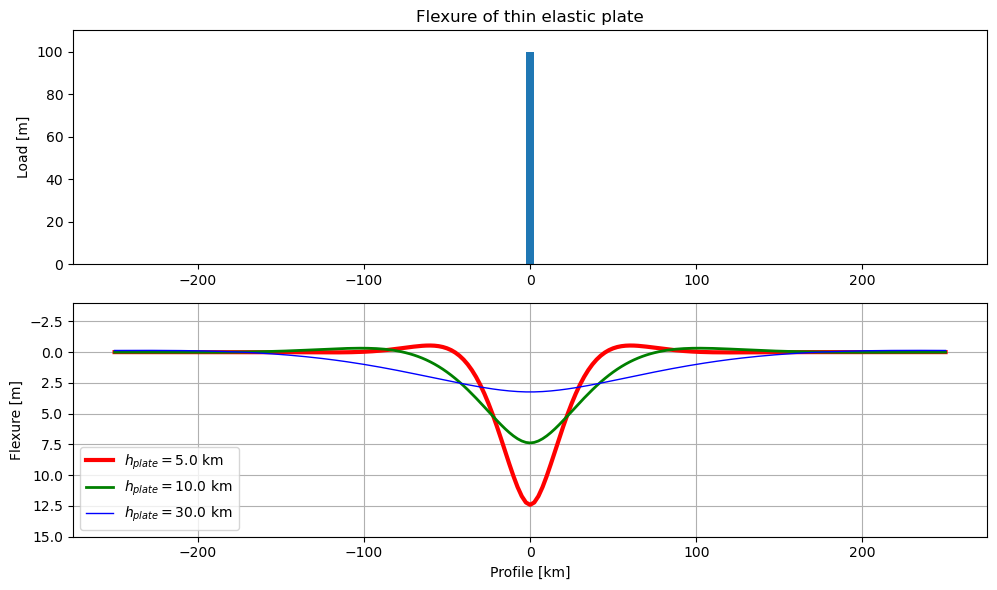

In [6]:
fig,axs = plt.subplots(2,1,figsize=(10,6))
axs[0].set_title('Flexure of thin elastic plate')

axs[0].set_ylim([0.,1.1*htopo])
#axs[0].set_xlabel('Profile [km]')
axs[0].set_ylabel('Load [m]')
axs[0].fill_between([x.min()/1e3,-hwidth/2e3,-hwidth/2e3,hwidth/2e3,hwidth/2e3,x.max()/1e3],[0,0,htopo,htopo,0,0])

axs[1].set_ylim([15,-4])
axs[1].set_xlabel('Profile [km]')
axs[1].set_ylabel('Flexure [m]')
axs[1].plot(x/1e3,w[0][:],lw=3,color='red',label='$h_{plate}=$'+str(round(h[0]/1e3,1))+' km')
axs[1].plot(x/1e3,w[1][:],lw=2,color='green',label='$h_{plate}=$'+str(round(h[1]/1e3,1))+' km')
axs[1].plot(x/1e3,w[2][:],lw=1,color='blue',label='$h_{plate}=$'+str(round(h[2]/1e3,1))+' km')
axs[1].grid()
axs[1].legend()
plt.tight_layout()
plt.savefig('images/plate_solution.png',dpi=400)

----
## Numerical 1D example

----
## 2D

$$
w(x,y) = \rho_T g t(x,y) \Delta x \Delta y \frac{b^2}{2\pi D} 
\mbox{kei} \left(
\frac{\sqrt{(x-x_i)^2 + (y-y_i)^2}}{b}
\right)
$$
with
$$
b^4 = \frac{D}{(\rho_M - \rho_W)g}
$$

In [9]:
def flexure2D(x,y,w0,b):
    w = w0 * scipy.special.kei(np.sqrt(x**2 + y**2) / b)
    return w

In [16]:
# flexural rigidity [Nm]
D = np.zeros(len(h))
# flexural parameter [m]
b = np.zeros(len(h))

for i in range(len(h)):
    D[i] = E*h[i]**3 / (12*(1-nu**2))
    b[i] = (D[i] / ((rhomantle-rhowater)*g))**(1/4)
    #print(D[i],a[i])
    
X,Y = np.meshgrid(np.linspace(-250e3,250e3,101),np.linspace(-250e3,250e3,101))
W = np.empty([len(h),X.shape[0],X.shape[1]])

print(W.shape,W.min(),W.max())

for i in range(len(h)):
    w0 = hwidth**2 * rhotopo * g * htopo * b[i]**2 / 2 / np.pi / D[i]
    W[i][:][:] = flexure2D(X,Y,w0,b[i])
    
print(W.shape,W.min(),W.max())

(3, 101, 101) nan nan
(3, 101, 101) -1.6099616197057198 0.02299113601731144


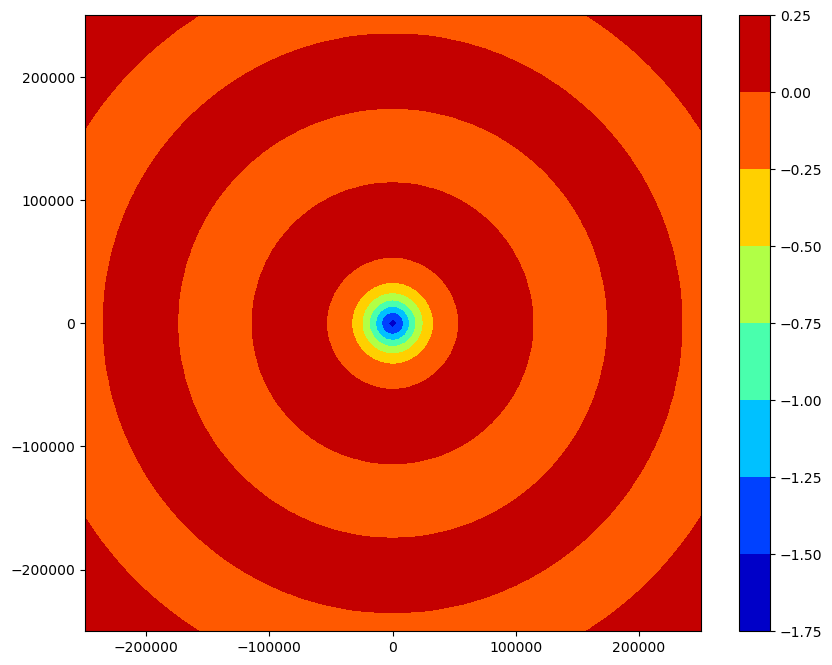

In [27]:
fig = plt.figure(figsize=(10,8))
plt.axes(aspect='equal')
cs1=plt.contourf(X,Y,W[0,:,:],cmap='jet')
plt.colorbar(cs1)

... done